-0.00046799720476664586

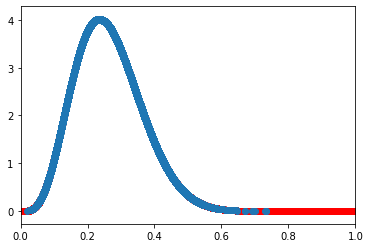

In [96]:
import math
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

def f(x,alpha,beta):
    return (x**(alpha-1))*((1-x)**(beta-1))/gamma(alpha,beta)
    
def gamma(alpha,beta):
    return math.factorial(alpha-1)*math.factorial(beta-1)/math.factorial(alpha+beta-1)
    

alpha = 5
beta = 14
a = 0 #interval start
b = 1 #interval end

def g(x):
    return 1/(b-a)

max_x = opt.fmin(lambda x: -f(x,alpha,beta), 0, disp=False)
M = math.ceil(f(max_x[0],alpha,beta)/g(1))
n = 100000

def rejection_sampling(n):
    accepts = []
    for i in range(n+1):
        u = np.random.uniform(a,b,1)[0]
        t = np.random.uniform(a,b,1)[0]
        importance_ratio = f(u,alpha,beta)/(M*g(u))
        if importance_ratio > 1:
            raise ValueError("importance ratio exceeds 1")
        
        if t<importance_ratio:
            accepts.append(u)
    return accepts

x = np.random.uniform(a,b,n)
y = [f(i,alpha,beta) for i in x]
accepts = rejection_sampling(n)
plt.scatter(x,y, color='r',alpha=.1)
plt.scatter(accepts, [f(i,alpha,beta) for i in accepts])
plt.xlim((0,1))

np.mean(accepts)-(5/19)

59

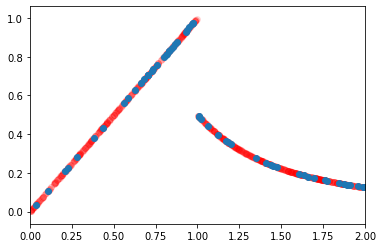

In [98]:
# e^-x is decreasing on [0,2]

import math
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    if x>0 and x<1:
        return x
    if x>1:
        return 1/(2*x**2)
    return 0
    

a = 0 #interval start
b = 2 #interval end

def g(x):
    return math.e**-x

M = math.ceil(1/g(b))
n = 1000

def rejection_sampling(n):
    accepts = []
    for i in range(n+1):
        u = np.random.uniform(a,b,1)[0]
        t = np.random.uniform(a,b,1)[0]
        importance_ratio = f(u)/(M*g(u))
        if importance_ratio > 1:
            raise ValueError("importance ratio exceeds 1")
        
        if t<importance_ratio:
            accepts.append(u)
    return accepts

x = np.random.uniform(a,b,n)
y = [f(i) for i in x]
accepts = rejection_sampling(n)
plt.scatter(x,y, color='r',alpha=.1)
plt.scatter(accepts, [f(i) for i in accepts])
plt.xlim((0,2))
len(accepts)